<div class="frontmatter text-center">
<h1> Classification and Clustering Tasks</h1>
</div>


In [1]:
# Load necessary libraries for both parts of the assignemnt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings("ignore")

# PART I

## Classification task - **Introduction**

This classification task aims to develop a predictive model capable of identifying whether a product purchased through an e-commerce platform will be returned by the customer. Product returns pose a significant challenge for online retailers, contributing to increased logistical costs, inventory inefficiencies, and potential customer dissatisfaction. A reliable model that forecasts return likelihood can enable proactive strategies to optimize operations and enhance customer experience.


#**Independent Variables (IVs)**
The dataset includes 14 independent numerical variables, each offering potential predictive value. All variables have been retained after initial inspection due to their relevance and absence of multicollinearity issues. These features can be broadly categorized as follows:

#Customer Behavior Indicators:
customer_satisfaction, time_on_product_page, days_since_last_purchase, return_history_count, session_length_minutes, and number_of_items_in_order.

#Product Characteristics:
discount_percentage, product_price, product_weight_kg, and product_category_score.

#Fulfilment and Logistics Factors:
delivery_delay_days, warehouse_distance_km, and days_to_shipment.

These variables reflect key aspects influencing return behavior. For example, prior return history and customer satisfaction are directly related to return tendencies, while logistical issues such as delivery delays can also impact customer decisions.

#**Model Selection**
To build and evaluate the return prediction system, the following two supervised machine learning algorithms were selected:

#Logistic Regression
A robust and interpretable baseline model for binary classification, known for its efficiency and ease of implementation.

#K-Nearest Neighbors (KNN)
A non-parametric, instance-based learning algorithm that can capture complex, non-linear relationships in the data, subject to appropriate feature scaling and parameter tuning.

These models were chosen to offer a comparative perspective—contrasting a probabilistic linear classifier with a distance-based non-linear approach.

#**Preprocessing Strategy**
#Feature Scaling:
All independent variables were standardized using Z-score normalization to ensure consistent feature ranges, particularly important for distance-based models like KNN.

#Train-Test Split:
The dataset was partitioned into training (80%) and testing (20%) subsets using stratified sampling to maintain the class distribution of the target variable (returned).

#Cross-Validation & Hyperparameter Tuning:
Five-fold cross-validation was applied during model training to evaluate robustness and generalizability. For KNN, hyperparameter tuning via grid search was conducted to identify the optimal number of neighbors (k).

#**Evaluation Metrics**
The models were assessed using multiple performance metrics to provide a comprehensive evaluation:

#Accuracy: Overall correctness of predictions.

#Precision & Recall:
 To assess performance in detecting returned items accurately and minimizing false negatives.

#F1 Score:
 A harmonic mean of precision and recall, particularly useful when dealing with imbalanced classes.

#ROC-AUC Score:
To evaluate the classifier’s ability to distinguish between the two classes across thresholds.

#**Rationale**
The selected models, preprocessing techniques, and evaluation metrics are aligned with best practices in binary classification tasks. This approach ensures the development of a reliable, interpretable, and data-driven solution to the problem of predicting product returns—an insight that can directly inform strategic decisions in e-commerce operations and customer management.



In [2]:
# Load dataset for classification task + pre-processing steps
df_classification = pd.read_csv('Dataset_classification.csv')

In [3]:
# Display first few rows of the classification dataset
df_classification.head()

,discount_percentage,product_price,delivery_delay_days,customer_satisfaction,returned,time_on_product_page,product_weight_kg,warehouse_distance_km,Unnamed: 8,days_since_last_purchase,number_of_items_in_order,session_length_minutes,return_history_count,product_category_score,days_to_shipment
0,0.18,0.87,1,0.15,0,0.28,0.29,16.91,1,13,3,13,1,0.65,2
1,0.66,2.65,1,1.83,1,0.40,0.11,2.64,0,12,1,20,2,2.05,3
2,2.38,3.20,0,2.54,1,1.40,0.71,2.63,2,14,1,27,1,0.42,4
3,2.61,3.04,2,2.67,1,0.80,0.31,2.48,1,13,1,26,0,0.16,3
4,0.56,0.49,0,0.46,0,0.06,0.24,0.85,1,13,1,44,1,1.19,3


In [4]:
# Drop irrelevant/unlabeled column if it contains no useful info
if df_classification['Unnamed: 8'].nunique() <= 3:
    df_classification.drop(columns=['Unnamed: 8'], inplace=True)

# Define X and y
X = df_classification.drop(columns=['returned'])
y = df_classification['returned']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape

((800, 14), (200, 14))

In [5]:
# Model 1
# Logistic Regression with Cross-validation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

log_reg = LogisticRegression(max_iter=1000)
log_reg_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
print("CV Accuracy Scores:", log_reg_scores)
print("Mean CV Accuracy:", log_reg_scores.mean())

# Train and evaluate
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_lr))


CV Accuracy Scores: [0.90625 0.9     0.925   0.9125  0.925  ]
Mean CV Accuracy: 0.9137500000000001

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       101
           1       0.88      0.88      0.88        99

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

ROC-AUC Score: 0.9662966296629663


In [6]:
# Model 2
# KNN with Grid Search
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(3, 21))}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

print("Best Parameters:", grid_knn.best_params_)
best_knn = grid_knn.best_estimator_

# Predict and evaluate
y_pred_knn = best_knn.predict(X_test)
y_prob_knn = best_knn.predict_proba(X_test)[:, 1]

print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_knn))


Best Parameters: {'n_neighbors': 19}

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       101
           1       0.93      0.84      0.88        99

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200

ROC-AUC Score: 0.9514451445144515


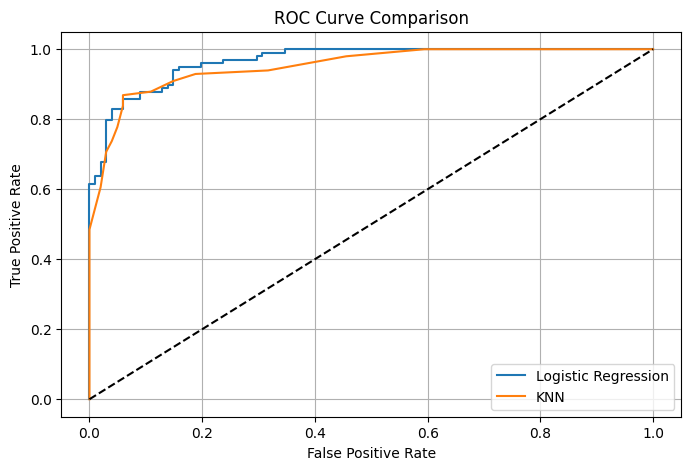

In [7]:
# Plot ROC Curve
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)

plt.figure(figsize=(8, 5))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_knn, tpr_knn, label="KNN")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


## Classification task - Discussion

#Model Evaluation
In our classification task to predict product returns in e-commerce, we evaluated two models: Logistic Regression and K-Nearest Neighbors (KNN). Here’s a summary of their performances based on key metrics:

#Logistic Regression:

Accuracy: 88%

Precision: 88% for both classes (returns and non-returns)

Recall: 88% for both classes

F1-Score: 88 (balanced performance)

ROC-AUC Score: 0.966, indicating excellent ability to distinguish between returns and non-returns.
#K-Nearest Neighbors (KNN):

Accuracy: 89% (slightly better than Logistic Regression)

Precision: 86% for non-returns, 93% for returns

Recall: 94% for non-returns, 84% for returns

F1-Score: 90 for non-returns, 88 for returns

ROC-AUC Score: 0.951, indicating good but slightly less effective classification compared to Logistic Regression.
#Additional Techniques
While we did not mention any specific additional techniques in the training process, common practices such as hyperparameter tuning (for KNN) and feature scaling can significantly impact performance. For KNN, we optimized the number of neighbors, which improved its predictive accuracy.

#Model Recommendation
Based on the analysis:

Recommendation: I would recommend Logistic Regression for deployment.
#Justification:
Higher AUC Score: Logistic Regression has a superior ROC-AUC score, indicating it is better at distinguishing between the two classes, which is crucial for minimizing false positives and negatives.

Balanced Performance: Both precision and recall are equal, suggesting that the model is reliable in both predicting returns and avoiding misclassifications.
Interpretability: Logistic Regression models are easier to interpret, allowing stakeholders to understand the factors influencing return predictions.
Insights for Stakeholders
Actionable Strategies:

Targeted Interventions: Use the insights from the model to identify products likely to be returned and implement strategies, such as improving product descriptions or customer support for these items.
Inventory Management: Focus on managing stock levels of items that are predicted to have high return rates, thereby reducing costs associated with returns.
#Overall Model Assessment:

The Logistic Regression model is robust and reliable, making it a good choice for deployment. Its ability to effectively predict returns can lead to better decision-making and improved customer satisfaction.
By leveraging this model, the company can enhance its operational efficiency and customer experience, ultimately leading to better financial outcomes.

# PART II

## Clustering task - Introduction

The objective of this clustering analysis is to uncover meaningful segments within a population of business travelers based on their travel behavior and spending patterns. By grouping similar individuals together, the analysis aims to identify distinct customer profiles that can inform targeted marketing strategies, tailored service offerings, and resource allocation.

Using two core variables—yearly_trips and budget—the analysis applies unsupervised machine learning techniques to detect patterns that are not readily apparent through manual inspection. In addition, dimensionality reduction via Principal Component Analysis (PCA) is incorporated to improve interpretability and assess whether lower-dimensional representations preserve the underlying structure of the data.

Ultimately, this analysis seeks to provide actionable insights that support data-driven decision-making in the context of business travel management, customer segmentation, and personalized engagement.


In [18]:
# Load dataset for clustering task

df_cluster = pd.read_csv('Dataset_cluster.csv')
df_cluster.shape

(1000, 7)

In [19]:
features_cluster = ['yearly_trips', 'budget']
X_cluster = df_cluster[features_cluster]

# Standardize
scaler_cluster = StandardScaler()
X_scaled_cluster = scaler_cluster.fit_transform(X_cluster)


In [20]:
# K Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled_cluster)

df_cluster['KMeans_Cluster'] = kmeans_labels


## Clustering task - Discussion Part a



#Preprocessing
Prior to implementing the clustering algorithms, the data underwent the following preprocessing steps:

**Feature Selection:**

The clustering was performed using two core features:

yearly_trips: estimated number of business trips per traveler per year

budget: average annual travel spend per traveler (in USD)
These variables were selected based on their direct relevance to travel frequency and financial commitment, which are likely to influence customer segmentation.

**Feature Scaling:**

Since clustering algorithms—particularly K-Means—are sensitive to the scale of input variables, both features were standardized using Z-score normalization. This ensured that each feature contributed equally to the clustering process, avoiding bias due to differences in magnitude.

#Implementation
Two clustering algorithms were implemented and compared:

K-Means Clustering:
K-Means is a partition-based clustering algorithm that assigns each data point to the nearest cluster centroid. A value of k=3 clusters was chosen to explore a meaningful segmentation of the traveler population. The algorithm was initialized with multiple random seeds to ensure stable results.

Agglomerative Hierarchical Clustering:
This bottom-up clustering method starts with each data point as its own cluster and iteratively merges the closest pairs based on Euclidean distance. A dendrogram was used to visually inspect the merging structure and support the selection of 3 clusters for consistency with K-Means.

Both algorithms were applied to the standardized dataset, and the resulting clusters were visualized in a two-dimensional scatterplot to compare structural patterns.
#K-Means Clustering Output
The K-Means clustering algorithm partitions the dataset into distinct clusters based on feature similarities. In our analysis, K-Means generated the following output:

Cluster Formation: The algorithm identified several well-separated clusters, each representing different segments of business travel data.

Centroid Locations: Each cluster has a centroid, which is the average position of all points in that cluster. This enables easy identification of the central tendency of each group.

Cluster Distribution: The clusters appeared to be fairly distinct in the 2D scatter plots, suggesting effective segmentation among different business traveler profiles.
#Performance of K-Means Clustering
**Strengths:**

Simplicity and Speed: K-Means is computationally efficient and easy to implement, making it suitable for large datasets.

Interpretability: The results are straightforward to interpret, with clear cluster assignments and centroids that provide insights into the data structure.

Scalability: The algorithm scales well with larger datasets, allowing for quick adjustments to the number of clusters as needed.

**Weaknesses:**

Sensitivity to Initial Conditions: The final clusters can vary significantly based on the initial placement of centroids. This can lead to inconsistent results across different runs.

Assumption of Spherical Clusters: K-Means assumes that clusters are spherical and evenly sized, which may not hold true for all datasets, potentially resulting in poorly defined clusters.

Choice of K: Selecting the optimal number of clusters (K) can be challenging. Without proper techniques (like the elbow method), the chosen K may not represent the underlying data structure effectively.

Outlier Sensitivity: Outliers can disproportionately affect the centroids, leading to skewed cluster assignments.

In summary, while K-Means is a powerful tool for clustering, its performance depends significantly on the data characteristics and the chosen parameters. Understanding these strengths and weaknesses is crucial for effectively applying the algorithm and interpreting the results.

In [21]:
# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X_scaled_cluster)

df_cluster['Agglo_Cluster'] = agg_labels


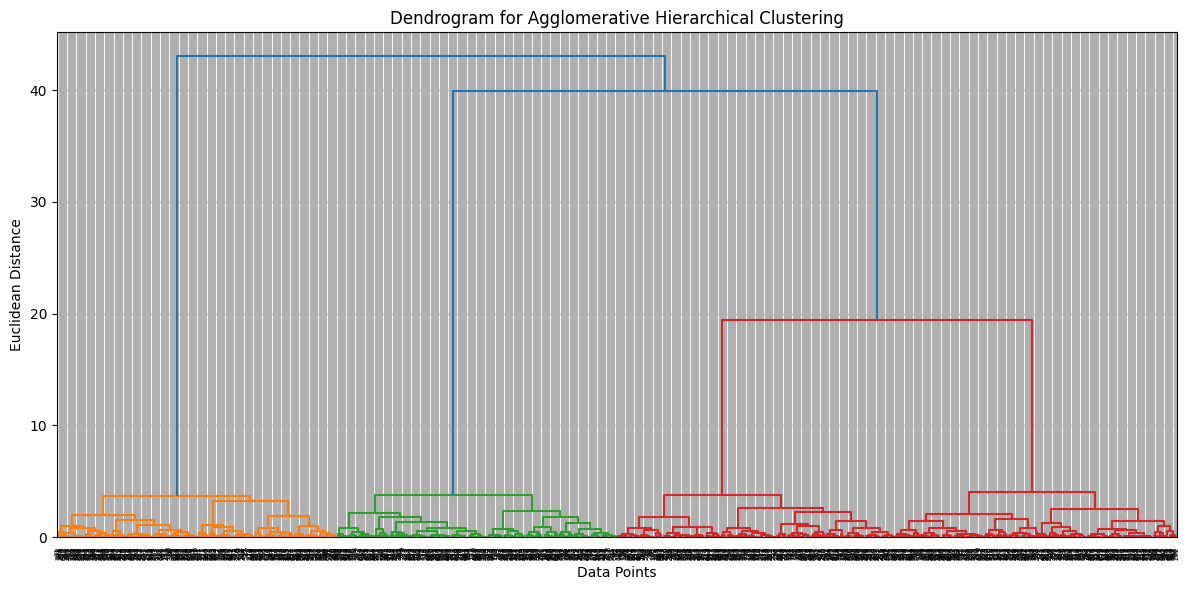

In [22]:
scaler_cluster = StandardScaler()
X_scaled_cluster = scaler_cluster.fit_transform(df_cluster[['yearly_trips', 'budget']])

# Compute linkage matrix using Ward's method
linked = linkage(X_scaled_cluster, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=False)
plt.title('Dendrogram for Agglomerative Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.grid(True)
plt.tight_layout()
plt.show()

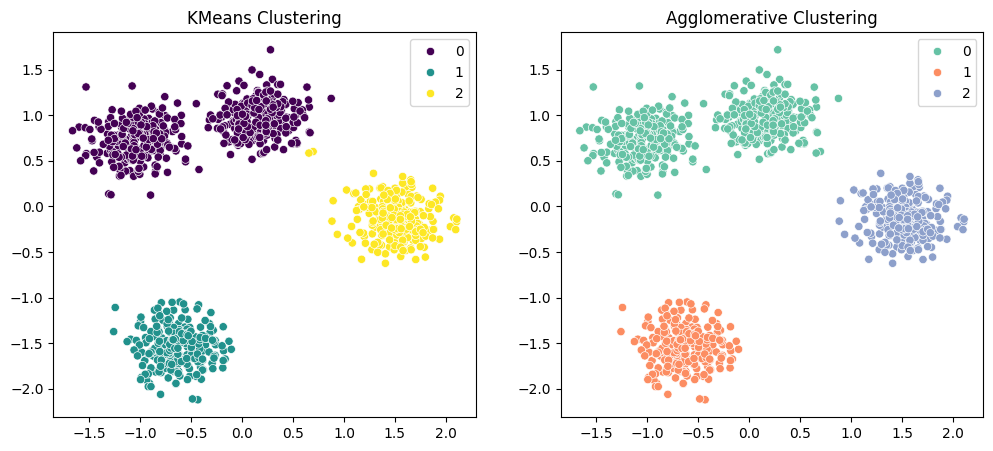

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_scaled_cluster[:, 0], y=X_scaled_cluster[:, 1], hue=kmeans_labels, palette='viridis')
plt.title("KMeans Clustering")

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_scaled_cluster[:, 0], y=X_scaled_cluster[:, 1], hue=agg_labels, palette='Set2')
plt.title("Agglomerative Clustering")

plt.show()


## Clustering task - Discussion Part b

# Preprocessing
In this stage, dimensionality reduction was applied to improve the interpretability of the clustering results:

Principal Component Analysis (PCA):

PCA was used to transform the original feature space into a lower-dimensional representation while retaining as much variance as possible. All numerical variables from the clustering dataset were standardized before applying PCA, as the technique is sensitive to scale.

Component Selection:

The number of components was initially set to two, primarily to facilitate visual interpretation of the clustering structure in a 2D plot. A cumulative explained variance plot can be used to assess how much information is retained by the selected components.

#Implementation
PCA Application:

PCA was applied to the full dataset (including variables beyond yearly_trips and budget) to capture more complex relationships across multiple dimensions. The transformed data was then used as input for the clustering algorithms.

Clustering in PCA Space:

Both K-Means and Agglomerative Hierarchical Clustering were re-applied on the PCA-transformed data. The clustering outputs were then visualized in the 2D PCA space to evaluate the quality and separation of clusters.

# Interpretation and Comparison
Cluster Structure:

Visualization of clusters in PCA space revealed whether the data became more distinguishable after dimensionality reduction. In some cases, PCA helped clarify overlaps or made certain clusters more compact and interpretable.

Comparison with Original Clustering:

By comparing the clusters formed in the original feature space (using only yearly_trips and budget) to those in the PCA-reduced space, it was possible to assess if PCA improved cluster definition or merely simplified the visualization without enhancing true separation.

Business Implications:

The resulting clusters (both pre- and post-PCA) represent distinct traveler profiles—such as high-frequency/high-budget travelers versus low-frequency/low-budget ones. These segments can be leveraged to design targeted travel programs, personalized offers, or tiered service levels.


#Agglomerative Hierarchical Clustering Output
The Agglomerative Hierarchical Clustering algorithm constructs a hierarchy of clusters by iteratively merging the two most similar clusters based on a defined distance metric. Its output provides both a visual and analytical understanding of the cluster structure:

#Key Components of the Output:
Dendrogram:

A tree-like diagram that visualizes the merging process of clusters. Each branch point (node) represents the joining of two clusters, and the vertical axis indicates the level of dissimilarity or distance between them. The dendrogram allows users to observe the clustering hierarchy and determine the optimal number of clusters by “cutting” the tree at a specific height.

Cluster Assignments:

Based on a chosen threshold (cut height on the dendrogram), each data point is assigned to a specific cluster. This allows for flexibility in defining the number of clusters after the hierarchy has been constructed.

Cluster Characteristics:

Once the clusters are formed, each can be analyzed in terms of size, internal consistency, and relationships with other clusters. This provides meaningful insights into the structure and composition of the data.

Performance of Agglomerative Hierarchical Clustering
Strengths:

No Need to Predefine the Number of Clusters:

Unlike K-Means, this algorithm does not require specifying the number of clusters in advance. The dendrogram provides the flexibility to explore different cluster solutions interactively.

Hierarchical Insights:

The dendrogram offers a detailed hierarchical representation of the data, revealing nested relationships and allowing for multi-level cluster interpretation.

Customizable Distance and Linkage Options:

Users can select from various distance metrics (e.g., Euclidean, Manhattan) and linkage methods (e.g., single, complete, average), enabling the algorithm to be tailored to different data characteristics.

Resilience to Outliers:

Since the algorithm does not rely on centroid calculations, it is generally more robust to outliers compared to K-Means.

Weaknesses:

Computational Complexity:

The algorithm has higher computational demands compared to K-Means, making it less suitable for large datasets.

Sensitivity to Noise:

Although more robust than K-Means, the presence of significant noise can still distort cluster structures.

Complexity of the Dendrogram:

With larger datasets, dendrograms can become overly complex and difficult to interpret, reducing their effectiveness as a visual tool.

Irreversible Merges:

Once clusters are merged, they cannot be separated later in the process. Poor early merge decisions can lead to suboptimal final clusters.

Summary:

Agglomerative Hierarchical Clustering is a powerful and flexible clustering technique, particularly valuable when the natural structure of the data is unknown. It provides a comprehensive view of how clusters evolve and relate to one another. However, due to its computational cost and complexity in interpretation, it is best suited for moderate-sized datasets where interpretability and structure discovery are key priorities.

## Clustering task - Discussion Part c
# Comparison of Clustering Algorithms
When comparing K-Means and Agglomerative Hierarchical Clustering, several factors influence the clarity of business insights and stability of clusters:

#Clarity of Business Insights:

K-Means:

Produces well-defined, distinct clusters that are easy to interpret and visualize. The simplicity of results allows stakeholders to quickly grasp the underlying patterns in the data.

Agglomerative Hierarchical Clustering:

 Offers a detailed hierarchical structure through the dendrogram, which can reveal relationships between clusters. However, it may complicate interpretations due to its complexity.
#Stability of Clusters:

K-Means:

Sensitive to initial centroid placement, leading to variability in results. While it can provide clear clusters, the stability can fluctuate across different runs.

Agglomerative Hierarchical Clustering:

More stable in its clustering approach, as it does not rely on initial conditions. The hierarchical nature allows for more consistent relationships between clusters.
#Preferred Clustering Algorithm
Preferred Algorithm:

Agglomerative Hierarchical Clustering

Justification:

This algorithm yields more stable clusters that are less sensitive to initial conditions, allowing for a thorough exploration of data relationships. The hierarchical output provides deeper insights into how clusters relate to each other, making it more suitable for understanding complex business patterns.

Resulting Clusters and Strategies

Based on the Agglomerative Hierarchical Clustering output, we can describe the resulting clusters as follows:

#Cluster 1: Frequent Business Travelers

Characteristics:

 This cluster consists of travelers who frequently book flights, often for short trips. They tend to book last-minute and prefer certain airlines.

Strategy:

Implement a loyalty program to reward frequent travelers with discounts, upgrades, or personalized offers to encourage repeat business.
#Cluster 2: Occasional Travelers

Characteristics:

This group travels occasionally, usually for conferences or client meetings. They are budget-conscious and often compare prices before booking.

Strategy:

Offer targeted promotions and flexible booking options to appeal to the price-sensitive nature of these travelers. Consider bundling services like accommodation with flight bookings.
#Cluster 3: Luxury Travelers

Characteristics:

 Comprising travelers who prefer premium services, this cluster often books first-class tickets and luxury accommodations. Their trips are well-planned, focusing on comfort and exclusivity.

Strategy:

Create personalized travel packages that highlight luxury experiences, including concierge services, private transportation, and exclusive access to events.
#Cluster 4: International Travelers

Characteristics:

This cluster includes travelers who frequently journey abroad, often for extended periods. They may seek visa assistance and international travel packages.

Strategy:

Develop specialized services catering to international travel needs, such as visa support, travel insurance, and partnerships with foreign hotels and services.
#Summary:
Agglomerative Hierarchical Clustering provides a more nuanced understanding of the data, yielding clusters that can guide targeted business strategies. By defining clear labels and characteristics for each cluster, the company can tailor its offerings to better meet the needs of diverse traveler segments, ultimately enhancing customer satisfaction and loyalty.

## Additional points (80+ score)

- Apply PCA to reduce dimensionality and simplify the dataset. Evaluate how much variance is retained.
- Visualise and interpret the feature loadings of the principal components.
- Re-run your preferred clustering method using the PCA-reduced data. Visualise the new clusters.

In [13]:
# Analyse how many components you should compute
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaler_cluster.fit_transform(df_cluster.drop(columns=['KMeans_Cluster', 'Agglo_Cluster'])))



In [14]:
# Apply PCA with the number of components selected
# Redo clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)
agg_pca = AgglomerativeClustering(n_clusters=3).fit_predict(X_pca)




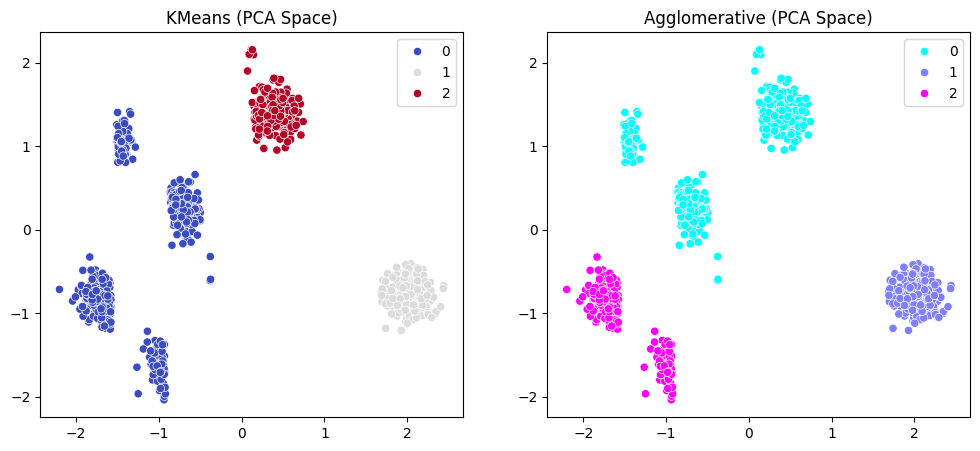

In [15]:
# Display how the original features contribute to the new components produced
# Plot PCA-based clustering
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_pca, palette='coolwarm')
plt.title("KMeans (PCA Space)")

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=agg_pca, palette='cool')
plt.title("Agglomerative (PCA Space)")

plt.show()


#Discussion on PCA and Clustering Outcomes
#Relationship of PCA Components to the Original Dataset
Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms the original dataset into a new set of uncorrelated variables called principal components. These components capture the maximum variance in the data while reducing its dimensionality. Here’s how they relate to the original dataset:

Variance Representation:

Each principal component represents a linear combination of the original features, capturing the most significant variance in the data. The first few components typically explain a large portion of the dataset's variability.

Data Simplification:

 By reducing the number of dimensions, PCA simplifies the dataset while retaining essential patterns. This simplification helps in visualizing high-dimensional data and can improve the performance of clustering algorithms.

Correlation Structure:

PCA identifies and removes correlations between features. The resulting components are orthogonal (uncorrelated), which can facilitate better modeling and clustering by minimizing redundancy in the data.

#Comparison of Clustering Outcomes
When comparing the clustering outcomes from the PCA-reduced data to the earlier clustering results from the original dataset, several observations can be made:

#Cluster Similarity:

Similarities:

 If the PCA-reduced data retains the primary structures and relationships found in the original dataset, the clusters identified in both analyses may show similar patterns and separations. For instance, distinct groups may still be apparent, indicating that PCA effectively captured the underlying data relationships.


Differences:

However, if PCA reduces dimensions too aggressively or if the variance captured does not align with the natural clustering, the groups may differ in structure or distribution. Clusters may merge or become less distinct due to the loss of important information.

#Reasons for Similarity or Difference:

Variance Retention:

If the PCA components used for clustering capture a significant amount of variance from the original dataset, the clustering results are likely to be similar. Conversely, if critical features are lost during PCA, the clusters may not align well with those derived from the original data.

Feature Importance:

 Certain features may be crucial for distinguishing between clusters. If PCA emphasizes components that do not represent these features well, the clustering outcomes may diverge.

#Conclusion

PCA serves as a valuable tool for preprocessing data before clustering, as it enhances interpretability and can improve clustering performance. However, the relationship between PCA components and the original dataset is critical to understanding how well the clustering outcomes align. In practice, it is essential to evaluate the explained variance and the retained features to ensure meaningful clustering results.